# imports and define a function to load the data

In [126]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [127]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

# start to load the data frame

In [128]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# information about the data

In [129]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# value count of the ocean_porximity

In [130]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# summary statistics of the numerical attributes

In [131]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# view the mean and the 50%

In [132]:
housing.describe().loc[['mean', '50%']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.53968,3.870671,206855.816909
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.00000,3.534800,179700.000000


# plot a histogram

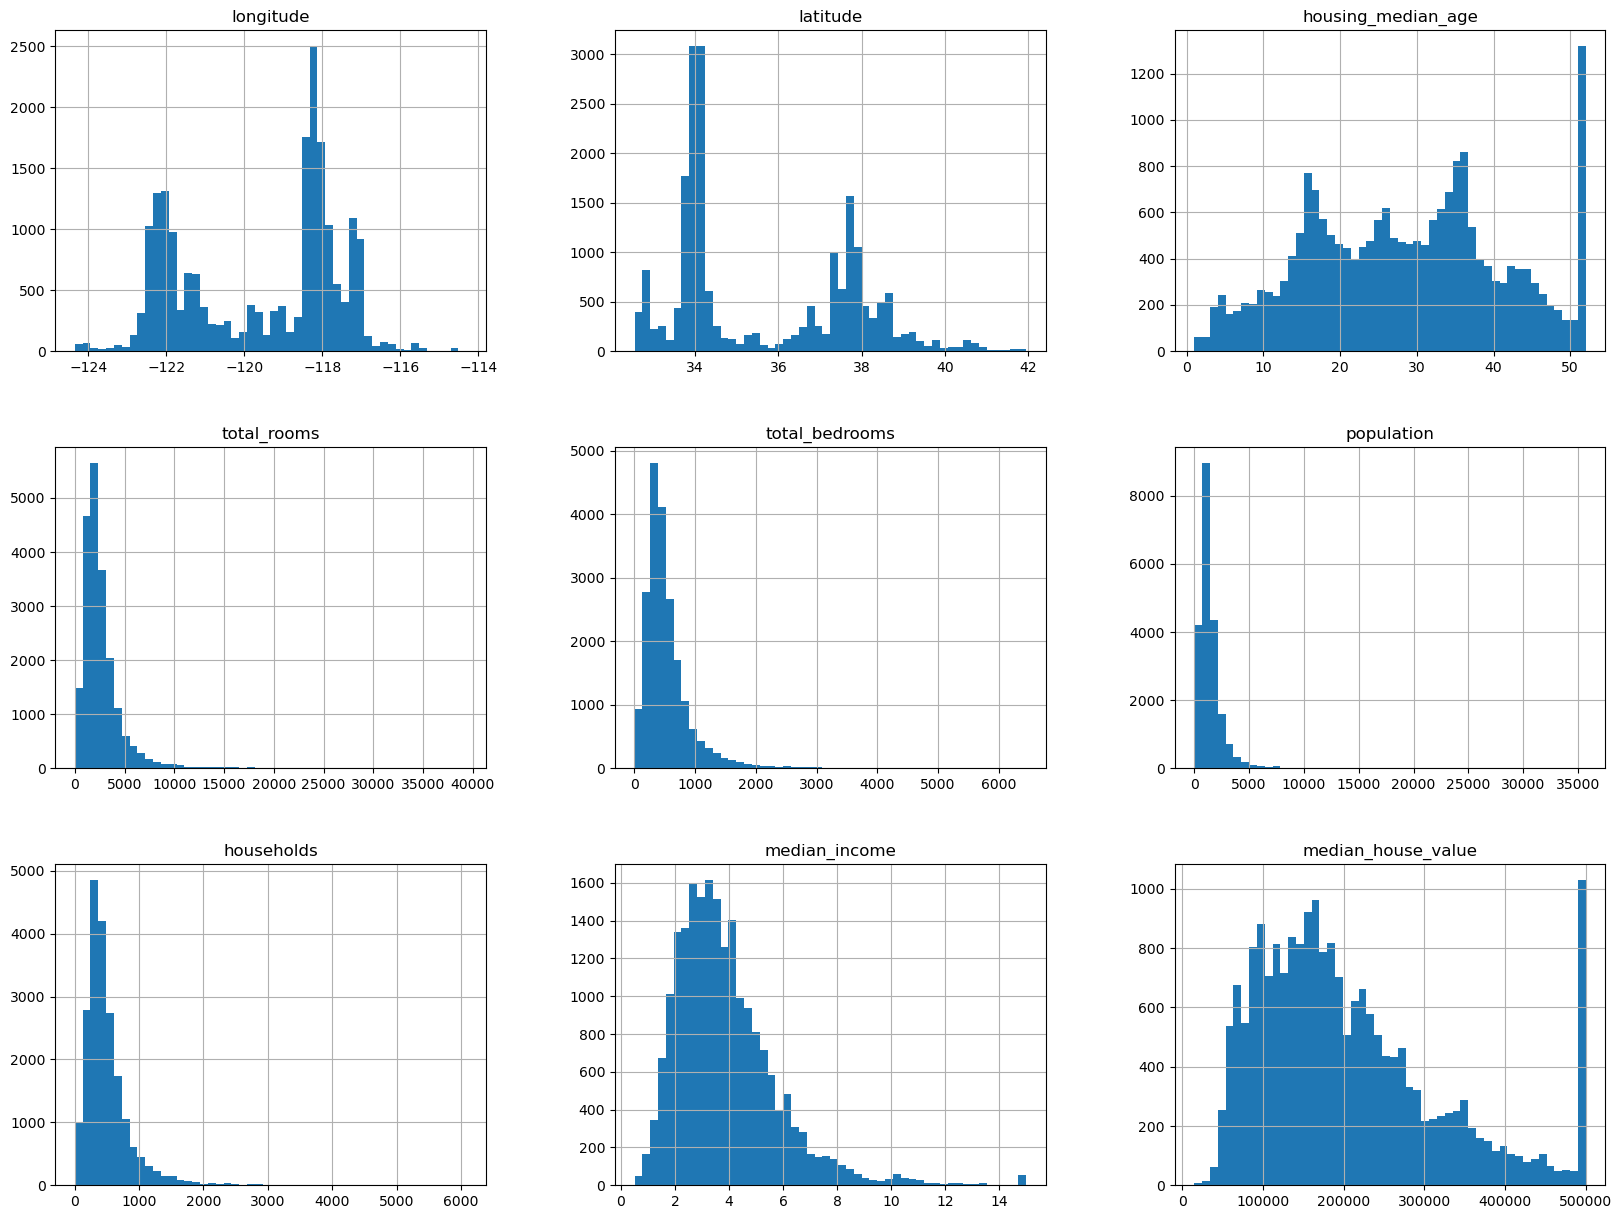

In [133]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

# split the data into, test and train set

In [134]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=30)

# shape of train_set & test_set

In [135]:
print("Train Set shape: ", train_set.shape, 
      "\nTest Set shape: ", test_set.shape) 

Train Set shape:  (16512, 10) 
Test Set shape:  (4128, 10)


# histogram of income categories

<Axes: >

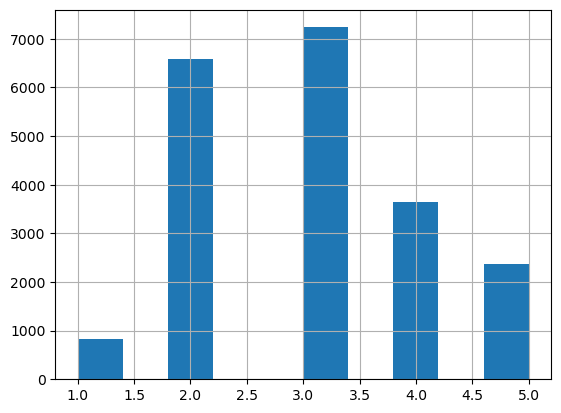

In [136]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., float("inf")],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

# Stratified sampling based on the income category

In [137]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## remove the 'income_cat' attribute to get the data back to it's original state

In [138]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

# Visualize the Data to Gain Insights

# copy the train set to visualize the data without harming it

In [139]:
housing = strat_train_set.copy()

# Visualizing the Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

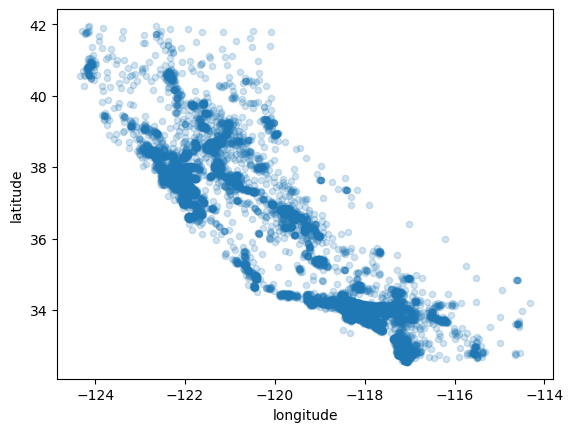

In [140]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.2)
# set the alpha to 0.2 to visualiz the density areas better

# it looks like California all right

## let's see the radius of each circle represents the population

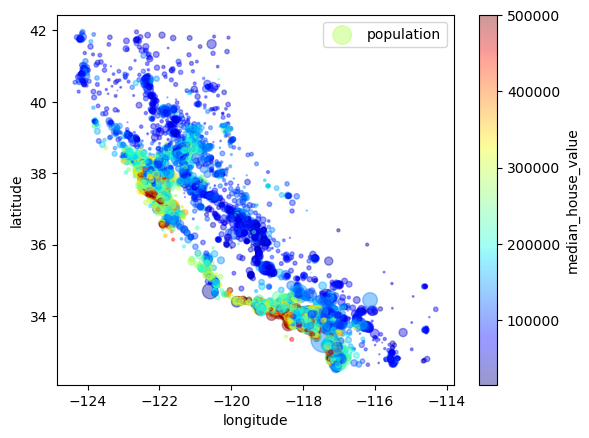

In [141]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population',
             c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Search for Correlations

In [142]:
corr_matrix = housing.corr(numeric_only=True)

# let's look at how much each attribute correlates with the median house value

In [143]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689807
total_rooms           0.139839
housing_median_age    0.107991
households            0.069386
total_bedrooms        0.052896
population           -0.021629
longitude            -0.044043
latitude             -0.145561
Name: median_house_value, dtype: float64

# Correlation Visualization

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

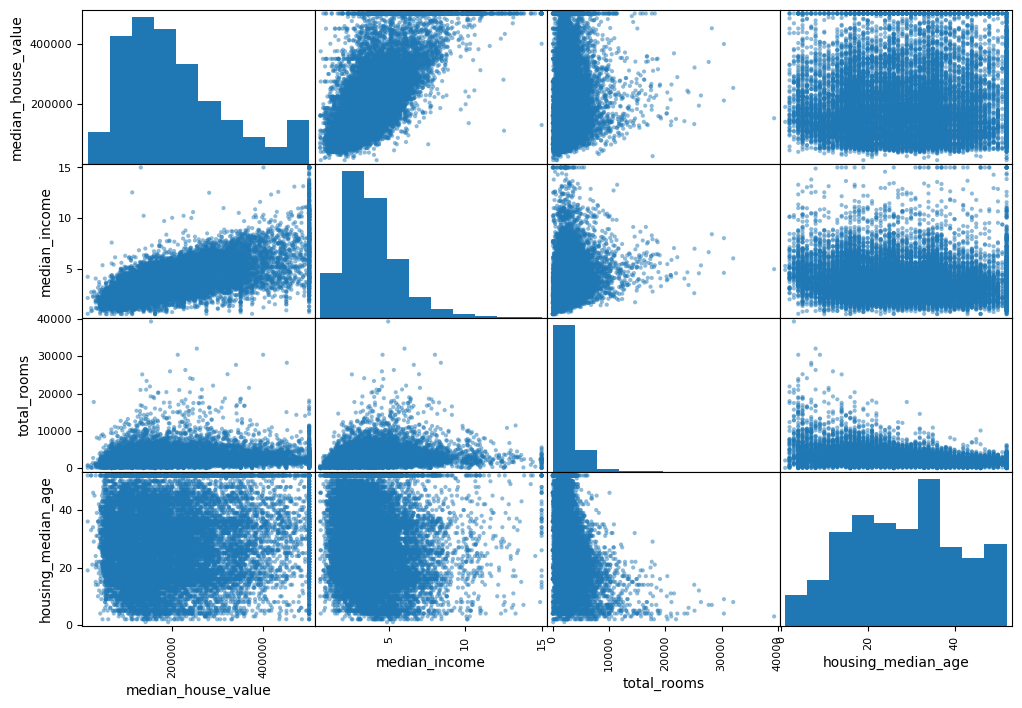

In [144]:
attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# seems like the most related value to our target is the "median_income", so let's zoom on it.

<Axes: xlabel='median_income', ylabel='median_house_value'>

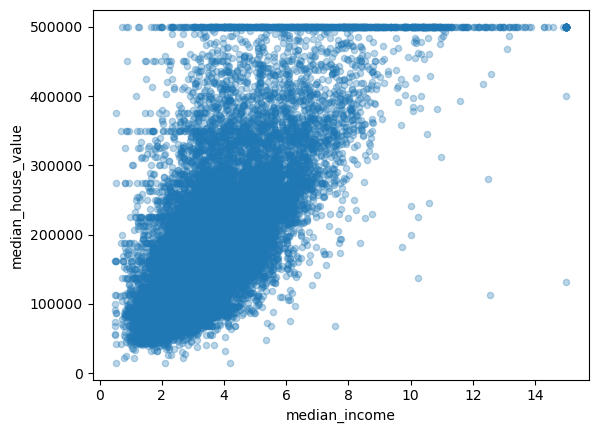

In [145]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3)

# let's try some attributes combinations

In [146]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

# let's see the correlation

In [147]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689807
rooms_per_household         0.156991
total_rooms                 0.139839
housing_median_age          0.107991
households                  0.069386
total_bedrooms              0.052896
population                 -0.021629
population_per_household   -0.022978
longitude                  -0.044043
latitude                   -0.145561
bedrooms_per_room          -0.255591
Name: median_house_value, dtype: float64

# prepare the data for machine learning algorithms

In [148]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# Data Cleaning

## we saw earlier that we have null values in the total_bedrooms, so let's fix it now.

In [149]:
# we have three options 
## 1-drop the whole column
## 2-drop null rows
## 3-fill the null values by the zero, mean, median.

## we will use the imputer to fill the nulls with median.

In [150]:
imputer = SimpleImputer(strategy='median')

## median can only be computed on numerical attribute
## so we will copy numerical attributes in another dataframe

In [151]:
housing_num = housing.drop(['ocean_proximity'], axis=1)


## now we can fit the imputer

In [152]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

### now simply the imputer computed the median value of each numerical attribute.
### and stor it the statistics_instance variable.
### it is safer to apply the imputer to numerical attributes.

In [153]:
statistics_instance = imputer.statistics_
statistics_instance


array([-118.48  ,   34.25  ,   29.    , 2125.    ,  435.    , 1165.    ,
        410.    ,    3.5341])

## now apply the median value to all attributes.

In [154]:
X = imputer.transform(housing_num)

### let's see the result after putting them back into pandas DataFrame

In [155]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)